<a href="https://colab.research.google.com/github/Sivanesan-R/Sales-Prediction/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv("train.csv")

In [ ]:
train_data.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [ ]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train_data.shape

(8523, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Check Null Values


In [ ]:
train_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
per = train_data.isnull().sum()/train_data.shape[0]*100
print(per)

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64


In [ ]:
train_data.duplicated().any()

np.False_

##Missing Value

In [ ]:
train_data['Item_Weight']

,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


In [ ]:
train_data['Outlet_Size']

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Medium
4,High
...,...
8518,High
8519,Medium
8520,Small
8521,Medium


In [ ]:
weight_median = train_data['Item_Weight'].median()
weight_mean = train_data['Item_Weight'].mean()

In [ ]:
print(weight_median,weight_mean)

12.857645184135976 12.857645184135976


In [ ]:
train_data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn = KNNImputer(n_neighbors=10,weights='distance')

In [ ]:
  train_data['knn_imputer']= knn.fit_transform(train_data[['Item_Weight']]).ravel()

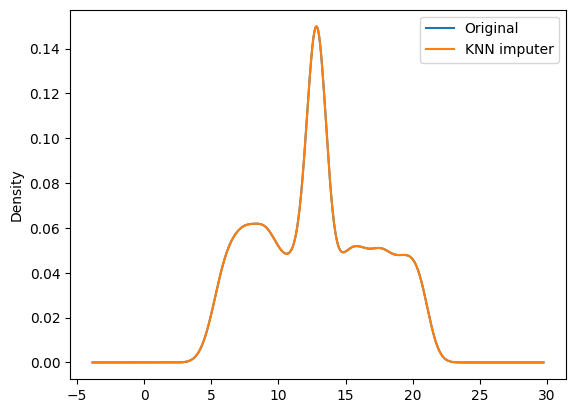

In [ ]:
train_data['Item_Weight'].plot(kind = "kde",label="Original")

train_data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [ ]:
train_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
missing_values = train_data['Outlet_Size'].isnull()

In [ ]:
missing_values

,Outlet_Size
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [ ]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'knn_imputer'],
      dtype='object')

In [ ]:
train_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
train_data.replace(
    {'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'
    }},inplace = True
)

In [ ]:
train_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
LF,5517
Regular,3006


In [ ]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'knn_imputer'],
      dtype='object')

In [ ]:
data = train_data
data['Item_Visibility'].value_counts()

,count
Item_Visibility,
0.000000,526
0.076975,3
0.061271,2
0.046825,2
0.112399,2
...,...
0.054142,1
0.018920,1
0.044974,1


In [ ]:
data['Item_visible_interpolate'] = data['Item_Visibility'].interpolate(method = 'linear')

In [ ]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,knn_imputer,Item_visible_interpolate
0,FDA15,9.3,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [ ]:
data['Item_visible_interpolate'].value_counts()

,count
Item_visible_interpolate,
0.000000,526
0.076975,3
0.061271,2
0.046825,2
0.112399,2
...,...
0.054142,1
0.018920,1
0.044974,1


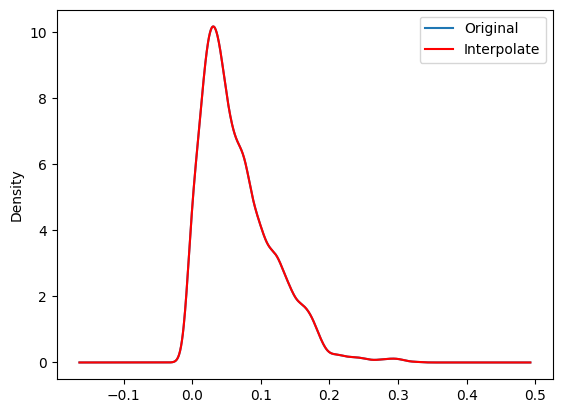

In [ ]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_visible_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'knn_imputer',
       'Item_visible_interpolate'],
      dtype='object')

In [ ]:
data['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
data['Item_Identifier'].value_counts().sample(5)

,count
Item_Identifier,
FDG20,5
NCC19,4
FDE51,7
FDZ45,6
FDI56,6


In [ ]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [ ]:
data['Item_Identifier'].value_counts()

,count
Item_Identifier,
FD,6125
NC,1599
DR,799


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [ ]:
data_encoded.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,knn_imputer,Item_visible_interpolate
0,1.0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380,9.30,0.016047
1,0.0,5.92,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228,5.92,0.019278
2,1.0,17.50,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700,17.50,0.016760


In [ ]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
y = data_encoded['Item_Outlet_Sales']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,scoring = 'r2')

In [ ]:
print(scores.mean())

0.5520588580012445


In [ ]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5948180411792191


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_train,y_train)

0.506533567447347

In [ ]:
print("Mean R-squared score:", scores.mean())

Mean R-squared score: 0.5948180411792191


In [ ]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_

}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
10,Outlet_Type,0.568770
6,Outlet_Identifier,0.157128
5,Item_MRP,0.131437
7,Outlet_Establishment_Year,0.126483
9,Outlet_Location_Type,0.005160
12,Item_visible_interpolate,0.002398
3,Item_Visibility,0.002290
4,Item_Type,0.001745
8,Outlet_Size,0.001417
11,knn_imputer,0.001049


In [ ]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_val_score

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X.drop(['Item_Visibility','knn_imputer',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5960739075259351


In [ ]:
final_data = X.drop(columns=['Item_Visibility','knn_imputer',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [ ]:
final_data

,Item_Weight,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_visible_interpolate
0,9.300,249.8092,9.0,1999,1.0,1.0,0.016047
1,5.920,48.2692,3.0,2009,1.0,2.0,0.019278
2,17.500,141.6180,9.0,1999,1.0,1.0,0.016760
3,19.200,182.0950,0.0,1998,1.0,0.0,0.000000
4,8.930,53.8614,1.0,1987,0.0,1.0,0.000000
...,...,...,...,...,...,...,...
8518,6.865,214.5218,1.0,1987,0.0,1.0,0.056783
8519,8.380,108.1570,7.0,2002,1.0,1.0,0.046982
8520,10.600,85.1224,6.0,2004,2.0,1.0,0.035186
8521,7.210,103.1332,3.0,2009,1.0,2.0,0.145221


In [ ]:
from xgboost import XGBRFRegressor

In [ ]:
xg_final = XGBRFRegressor()

In [ ]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
xg_final.fit(X_train,y_train)


XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [ ]:
y_pred = xg_final.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

713.0512730551586

In [ ]:
# Retrain the model on final_data
xg_final.fit(final_data, y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, ...)

In [ ]:
# Example prediction with an input array of 7 features
# Replace these placeholder values with your actual data
sample_input = np.array([[10.0, 150.0, 9.0, 2000, 1.0, 1.0, 0.05]])
pred = xg_final.predict(sample_input)[0]
print("Predicted Item Outlet Sales:", pred)

Predicted Item Outlet Sales: 2606.8667


In [ ]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1892.44677734375 and 3321.28662109375


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the model on final_data using cross-validation
scores_final_model = cross_val_score(xg_final, final_data, y, cv=5, scoring='r2')

print("Cross-validation R-squared scores for the final model:", scores_final_model)
print("Mean R-squared score for the final model:", scores_final_model.mean())

Cross-validation R-squared scores for the final model: [0.60515918 0.58288844 0.57758758 0.60627116 0.61038195]
Mean R-squared score for the final model: 0.5964576624175749


In [ ]:
from google.colab import drive
drive.mount('/content/drive')